# Quantum Computing: Lab 1

In this first Lab we want to show you the basics of Python and Jupyter Notebooks needed for this Lecture. Afterwards, we want to writing our first circuits in qiskit and run them on the simulator and on a real device.

## Jupyter Notebooks

- this is an interactive Python environment
- each notebook contain cells
- each cell can contain Markdown (like this one) or Code, you can change this using the dropdown menu
- you can edit Markdown cells via double click or with `enter`
- each cell is executed on its own (all cells in one notebook share variables and states), thus the order of execution matters
- you can execute cells either with the play button, `ctrl + enter` or `shift + enter` (executes the cell and jumps to the next line or creates a new one)
- each Jupyter instance runs in its own container, user data is persisted, additional packages are not
- with `!` you can execute command-line commands from within a cell
- with `!pip install <package>` you can temporary install additional packages into your environment
- an hour after closing the browser window additional packages are removed, so runing this command at the begining of your notebook is recommended

## Python

- Python is an object oriented programming language, however we don't have to define classes and create objects if we don't want to (most of the time we won't use classes or objects)
- Python uses tabs and `:` instead of curly bracers (`{` or `}`) and semi-colons (`;`)
- the keyword for defining a function is `def`

In [1]:
def hello_world():
    print('Hello World!')
    
def round_digit(x):
    if x < 0:
        print('Error')
    elif x < 5:
        print(0)
    else:
        print(10)

In [2]:
hello_world()

Hello World!


In [3]:
round_digit(-2)
round_digit(4)
round_digit(5)

Error
0
10


- most of Pythons functionality needs to be imported first using `import`

In [4]:
import os
import numpy as np
from qiskit.aqua import QuantumInstance

In [5]:
np.sqrt(2) # the result is printed, since its the last statement in this cell

1.4142135623730951

## Quantum Computing using Matrix Calculation

- we can use numpy's arrays to create matrices and vectors 
- a column vector is actually a matrix from numpy's perspective, you will see why
- we will use `kron` for the tensor product and `matmul` for matrix multiplication

In [6]:
zero_qubit = np.array([[1], [0]])
print(zero_qubit)

[[1]
 [0]]


In [7]:
one_qubit = np.array([[0], [1]])
print(one_qubit)

[[0]
 [1]]


In [8]:
one_one = np.kron(one_qubit, one_qubit)
print(one_one)

[[0]
 [0]
 [0]
 [1]]


In [9]:
H = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])
print(H)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In the next cell we want to calculate the result of the following circuit:

![](./resources/circuit-H.png)

Remember, that we have to start from the right.

In [10]:
np.matmul(H, zero_qubit)

array([[0.70710678],
       [0.70710678]])

As you might remember from the lecture each entry in the vector is an amplitude. To get the probability we have to square each entry. To do so we define the following function.

In [11]:
def print_vector_probabilities(vec):
    for i in range(len(vec)):
        print(str(i) + ': ' + str(np.absolute(vec[i][0]) ** 2))

In [12]:
print_vector_probabilities(np.matmul(H, one_qubit))

0: 0.4999999999999999
1: 0.4999999999999999


In [13]:
print_vector_probabilities(one_one)

0: 0
1: 0
2: 0
3: 1


Since we are able to create quantum states manually, it might be useful to have function which checks if we have created a valid quantum state.

__Exercise 1__: Complete the function and test it with a valid and an invalid quantum state.

In [14]:
def is_quantum_state(psi: np.array):
    n = len(psi)
    ssum = 0.0
    
    # Add your calculation here
    for i in range(n):
        ssum = ssum + np.absolute(psi[i][0]) ** 2
    
    if ssum >= 0.998 and ssum < 1.009:
        return True
    else:
        return False

In [15]:
is_quantum_state(np.matmul(H, one_qubit))

True

## Qiskit

In the next section we want to work with qiskit. Qiskit is a SDK for IBMs quantum devices, however you can also use local and hosted simulators. Furhter, alternative quantum device providers start to support qiskit for their devices as well.

For a first small example, we want to add a X-Gate to a circuit and measure it. Here are a couple of hints how we are going to implement this:

- we use a `QuantumRegister` and a `ClassicalRegister` to create a `QuantumCircuit`, however the registers are not necessary, as you will see later
- we add a X-Gate to the circuit on the first qubit of the quantum register
- (optional) we draw the circuit to see how it looks, `'mpl'` stands for matplotlib
- we measure qubit zero to classical bit zero, we will see later an alternative method
- we execute the circuit on a backend, which we defined earlier; this returns a job
- we receive the result of the job (calling the `result` method starts the job)
- we receive the counts
- we use qiskits own method to print a histogram of the results

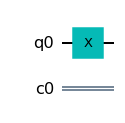

In [16]:
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

backend = BasicAer.get_backend('qasm_simulator')

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0])

circuit.draw('mpl')

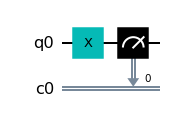

In [17]:
circuit.measure(q[0], c[0])
circuit.draw('mpl')

In [18]:
job = execute(circuit, backend, shots=1024)

In [19]:
result = job.result()
result.get_counts(circuit)

{'1': 1024}

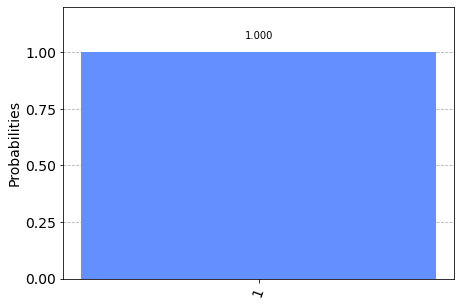

In [20]:
plot_histogram(result.get_counts(circuit))

### Bell-State with Qiskit

In the next advanced example we want to use 2 quibts and also use 2-qubit-gates to create the bell state. Here are some hints how we did this:

- we create a `QuantumCircuit`, the 2 indicates, that we want to have 2 qubits
- we add an Hadamard-Gate to qubit zero
- we add an CNOT-Gate to the circuit with the control qubit zero and target qubit one
- we use the `measure_all` method, to measure all qubits to classical bits
- we execute the circuit and plot the histogram

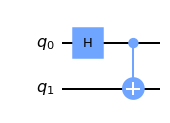

In [21]:
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)
bell_circuit.cnot(0, 1)

bell_circuit.draw('mpl')

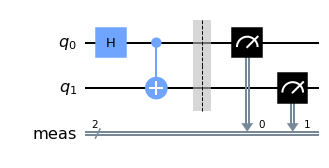

In [22]:
bell_circuit.measure_all()
bell_circuit.draw('mpl')

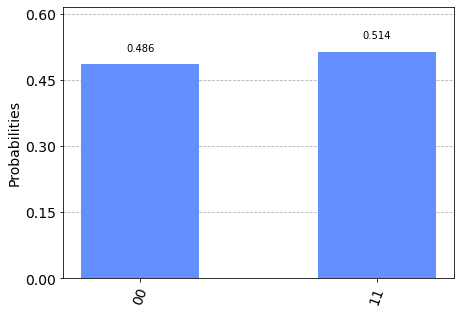

In [23]:
job = execute(bell_circuit, backend, shots=1024)
bell_result = job.result()
plot_histogram(bell_result.get_counts(bell_circuit))

![](./resources/circuit-deutsch.png)

__Exercise 2:__ Implement and execute the algorithm of Deutsch for the balanced and for the unbalanced case in qiskit. See above for a graphical visualisation of the algorithm. Remember the 'plus' is a X-Gate and the barriers in this example are only for visual support so you don't have to implement them.

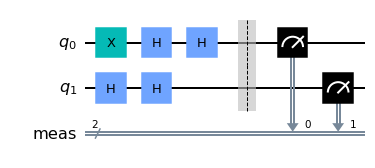

In [24]:
# Unbalanced => Constant
deutsch_circuit_constant = QuantumCircuit(2)
deutsch_circuit_constant.x(0)

deutsch_circuit_constant.h(0)
deutsch_circuit_constant.h(1)

deutsch_circuit_constant.h(0)
deutsch_circuit_constant.h(1)

deutsch_circuit_constant.measure_all()

deutsch_circuit_constant.draw('mpl')

{'01': 1024}


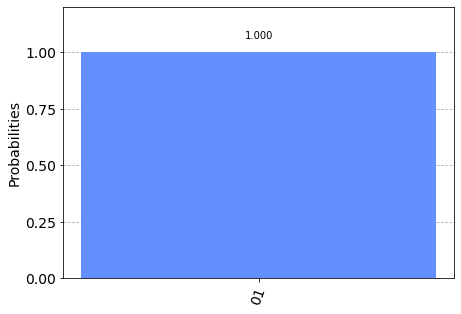

In [25]:
deutsch_circuit_constant_job = execute(deutsch_circuit_constant, backend, shots=1024)
deutsch_circuit_constant_result = deutsch_circuit_constant_job.result()

print(deutsch_circuit_constant_result.get_counts(deutsch_circuit_constant))
plot_histogram(deutsch_circuit_constant_result.get_counts(deutsch_circuit_constant))

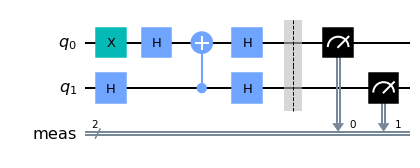

In [26]:
# Balanced
deutsch_circuit_balanced = QuantumCircuit(2)
deutsch_circuit_balanced.x(0)

deutsch_circuit_balanced.h(0)
deutsch_circuit_balanced.h(1)

deutsch_circuit_balanced.cnot(1, 0)

deutsch_circuit_balanced.h(0)
deutsch_circuit_balanced.h(1)

deutsch_circuit_balanced.measure_all()

deutsch_circuit_balanced.draw('mpl')

{'11': 1024}


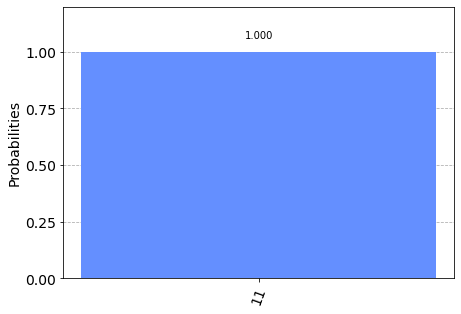

In [27]:
deutsch_circuit_balanced_job = execute(deutsch_circuit_balanced, backend, shots=1024)
deutsch_circuit_balanced_result = deutsch_circuit_balanced_job.result()

print(deutsch_circuit_balanced_result.get_counts(deutsch_circuit_balanced))
plot_histogram(deutsch_circuit_balanced_result.get_counts(deutsch_circuit_balanced))

### Working with real quantum devices

If you want to run your circuits on real hardware you need to store your IBM Q Experience API-Token in your pyhton environment (the registration is free). To do so visit https://quantum-computing.ibm.com/account and click the blue button 'Copy token' as shown in the following picture: 

![](./resources/ibmqtoken.jpg)

With this token you can execute the following method `IBMQ.save_account('<API-Token>', overwrite=True)` (imported from qiskit). You have to run this method every time in a python environement, when your token has changed.

After saving your account you have to load it everytime at the beginning of your program/jupyer notebook: `IBMQ.load_account()`.

Next, you specify your provider. For a free account it will look like this: `provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')`

The `provider` provides you with your backends. `provider.backends()` lists all of your backends.

In [28]:
from qiskit import *

# IBMQ.save_account('<API-Token>', hub='ibm-q', group='open', project='main', overwrite=True)

In [29]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [30]:
device_backend = provider.backend.ibmq_athens

### Using noise models

Since the execution takes very long, we will primarily use the noise model of a specific backend. Doing so we will get results, which are similar to the results from a real devices.

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'x', 'cx', 'id', 'sx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [1, 2]), ('cx', [2, 1]), ('cx', [1, 0]), ('cx', [0, 1]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


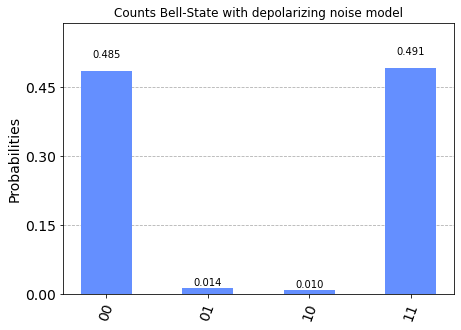

In [31]:
from qiskit.providers.aer.noise import NoiseModel

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Execute noisy simulation and get counts
result_noise = execute(bell_circuit, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(bell_circuit)
plot_histogram(counts_noise, title="Counts Bell-State with depolarizing noise model")

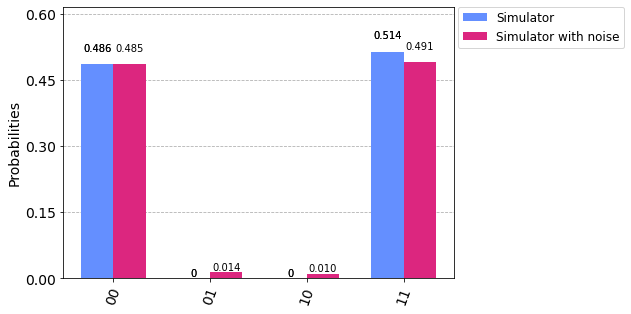

In [32]:
plot_histogram([bell_result.get_counts(bell_circuit), counts_noise], legend=['Simulator', 'Simulator with noise'])